# Understanding Over & Underfitting
## Predicting Boston Housing Prices

## Getting Started
In this project, you will use the Boston Housing Prices dataset to build several models to predict the prices of homes with particular qualities from the suburbs of Boston, MA.
We will build models with several different parameters, which will change the goodness of fit for each. 

---
## Data Exploration
Since we want to predict the value of houses, the **target variable**, `'MEDV'`, will be the variable we seek to predict.

### Import and explore the data. Clean the data for outliers and missing values. 

In [29]:
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
boston= load_boston()

/opt/anaconda3/envs/Iron/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing

In [16]:
data = pd.DataFrame(boston['data'],columns=boston['feature_names'])
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [23]:
target = pd.DataFrame(boston['target'],columns=['label'])
target

,label
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


In [14]:
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

### Next, we want to explore the data. Pick several varibables you think will be ost correlated with the prices of homes in Boston, and create plots that show the data dispersion as well as the regression line of best fit.

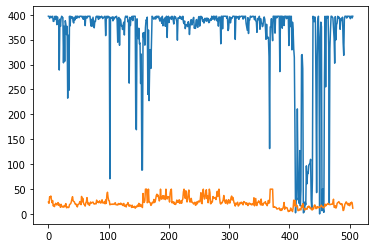

In [26]:
plt.plot(data['B'])
plt.plot(target)
plt.show()

### What do these plots tell you about the relationships between these variables and the prices of homes in Boston? Are these the relationships you expected to see in these variables?

In [34]:
full_data = pd.merge(right = target,
                    left = data,
                    right_index = True,
                    left_index =True)
full_data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,label
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


<AxesSubplot:>

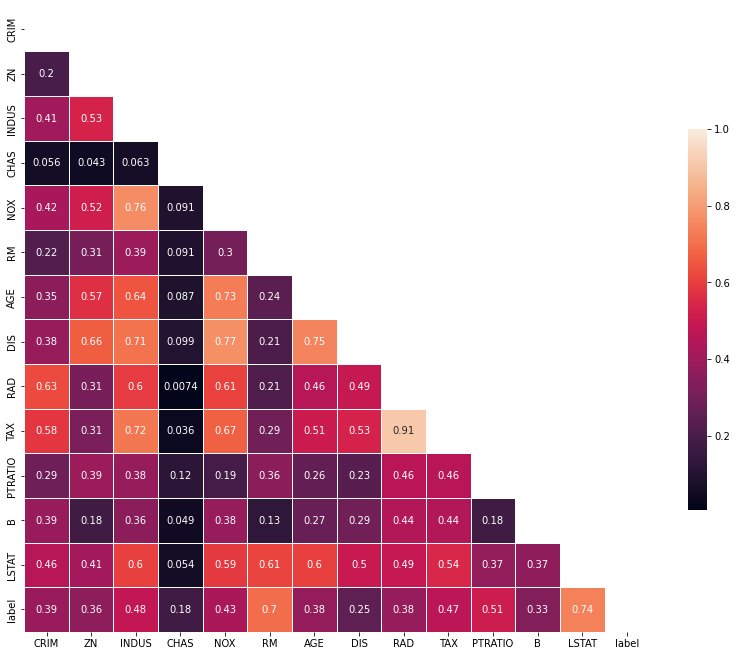

In [35]:
corr = np.abs(full_data.corr())
mask = np.zeros_like(corr, dtype = bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(14,14))
cmap = sns.diverging_palette(200,10 ,as_cmap =True)
sns.heatmap(corr, mask=mask, vmax= 1, square=True,linewidths =0.5, cbar_kws = {'shrink' :0.5},annot= corr)

### Make a heatmap of the remaining variables. Are there any variables that you did not consider that have very high correlations? What are they?

In [ ]:
# Your response here

### Calculate Statistics
Calculate descriptive statistics for housing price. Include the minimum, maximum, mean, median, and standard deviation. 

In [ ]:
# Your code here

----

## Developing a Model

### Implementation: Define a Performance Metric
What is the performance meteric with which you will determine the performance of your model? Create a function that calculates this performance metric, and then returns the score. 

In [36]:
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    return r2_score(y_true, y_predict)

### Implementation: Shuffle and Split Data
Split the data into the testing and training datasets. Shuffle the data as well to remove any bias in selecting the traing and test. 

In [39]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(data,target,random_state=1,test_size=0.25)

----

## Analyzing Model Performance
Next, we are going to build a Random Forest Regressor, and test its performance with several different parameter settings.

### Learning Curves
Lets build the different models. Set the max_depth parameter to 2, 4, 6, 8, and 10 respectively. 

In [46]:
from sklearn.ensemble import RandomForestRegressor
model_1 = RandomForestRegressor(max_depth = 2)
model_2 = RandomForestRegressor(max_depth = 4)
model_3 = RandomForestRegressor(max_depth = 6)
model_4 = RandomForestRegressor(max_depth = 8)
model_5 = RandomForestRegressor(max_depth = 10)

model_1.fit(x_train,y_train.values.ravel())
model_2.fit(x_train,y_train.values.ravel())
model_3.fit(x_train,y_train.values.ravel())
model_4.fit(x_train,y_train.values.ravel())
model_5.fit(x_train,y_train.values.ravel())

RandomForestRegressor(max_depth=10)

In [48]:
print(model_1.score(x_train,y_train.values.ravel()))
print(model_2.score(x_train,y_train.values.ravel()))
print(model_3.score(x_train,y_train.values.ravel()))
print(model_4.score(x_train,y_train.values.ravel()))
print(model_5.score(x_train,y_train.values.ravel()))

0.7636532762298619
0.9172031320403604
0.9549951404176074
0.972603795785085
0.9770212953409623


In [50]:
print(model_1.score(x_test,y_test.values.ravel()))
print(model_2.score(x_test,y_test.values.ravel()))
print(model_3.score(x_test,y_test.values.ravel()))
print(model_4.score(x_test,y_test.values.ravel()))
print(model_5.score(x_test,y_test.values.ravel()))

0.7961518491350943
0.8908478305329481
0.9069114043498909
0.9148079662498012
0.9132814813411756


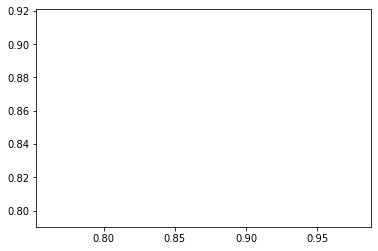

In [51]:
plt.plot(model_1.score(x_train,y_train.values.ravel()),model_1.score(x_test,y_test.values.ravel()))
plt.plot(model_2.score(x_train,y_train.values.ravel()),model_2.score(x_test,y_test.values.ravel()))
plt.plot(model_3.score(x_train,y_train.values.ravel()),model_3.score(x_test,y_test.values.ravel()))
plt.plot(model_4.score(x_train,y_train.values.ravel()),model_4.score(x_test,y_test.values.ravel()))
plt.plot(model_5.score(x_train,y_train.values.ravel()),model_5.score(x_test,y_test.values.ravel()))
plt.show()

Now, plot the score for each tree on the training set and on the testing set.

In [ ]:
# Produce a plot with the score for the testing and training for the different max depths

What do these results tell you about the effect of the depth of the trees on the performance of the model?

In [ ]:
## IT'S increasing the score

### Bias-Variance Tradeoff
When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? How about when the model is trained with a maximum depth of 10? Check out this article before answering: https://towardsdatascience.com/understanding-the-bias-variance-tradeoff-165e6942b229

In [ ]:
# Your response here

### Best-Guess Optimal Model
What is the max_depth parameter that you think would optimize the model? Run your model and explain its performance.

In [ ]:
#The max_depth = 10 seems to be the best params for this RandomForestRefressor

### Applicability
*In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.*  
**Hint:** Some questions to answering:
- *How relevant today is data that was collected from 1978?*
- *Are the features present in the data sufficient to describe a home?*
- *Is the model robust enough to make consistent predictions?*
- *Would data collected in an urban city like Boston be applicable in a rural city?*

In [ ]:
# Your response here